In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")

%autoreload 2
from mikg.kgraph import *
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

In [2]:
kg = KGraph()

In [3]:
kg.load_kgraph_base("../data/", go=True, omnipath=True, opentargets=True, reactome=True, STRING=True)

HMS:0:00:11.128710 626,136 annotations READ: ../data/goa_human.gaf 
../data/go-basic.obo: fmt(1.2) rel(2023-01-01) 46,739 Terms


/usr/local/hdd3/mikg/scripts/../mikg/load_utils.py:203: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  opd  = pd.read_csv(omnipathDB, sep="\t")
/usr/local/hdd3/mikg/scripts/../mikg/load_utils.py:307: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf["score"] = subdf[use_evidences].max(axis=1)/1000


PGM3 UAP1 {'fusion': 0, 'coexpression': 77, 'experiments': 272, 'database': 900, 'textmining': 720, 'score': 0.9}
PGM3 GNPNAT1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 700, 'score': 0.9}
PGM3 UAP1L1 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 459, 'score': 0.9}
PGM3 GLO1 {'fusion': 0, 'coexpression': 96, 'experiments': 272, 'database': 0, 'textmining': 729, 'score': 0.729}
PGM3 PGM2 {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 NAGK {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 561, 'score': 0.9}
PGM3 ADI1 {'fusion': 708, 'coexpression': 42, 'experiments': 0, 'database': 0, 'textmining': 0, 'score': 0.708}
PGM3 PGM5 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 720, 'score': 0.72}
PGM3 PGM1 {'fusion': 0, 'coexpression': 0, 'experiments': 272, 'database': 0, 'textmining': 719, 'sc

In [4]:
kg.get_edge_between_type()

Counter({('gene', 'geneset'): 412907,
         ('gene', 'gene'): 362249,
         ('gene', 'disease'): 48403,
         ('geneset', 'geneset'): 74934,
         ('drug', 'disease'): 35825,
         ('drug', 'gene'): 8267,
         ('drug', 'geneset'): 36})

In [5]:
kg.print_kg_info()

In [6]:
print(kg.kg)

DiGraph with 81264 nodes and 942621 edges


In [1]:
kg.save_kgraph("../data/initial_base_graph.out")

NameError: name 'kg' is not defined

In [8]:
kg = KGraph()
kg.load_kgraph("../data/initial_base_graph.out")

In [9]:
exprDF = pd.read_csv("../seq_data/expression_mean_df.tsv", sep="\t")
cmDF = exprDF[exprDF.group == "Cardiomyocyte"]
cmDF

group      gene       min  percentile_25    median   
22891  Cardiomyocyte      A1BG  0.218642       0.439190  0.607427  \
22892  Cardiomyocyte  A1BG-AS1  0.214143       0.456117  0.643483   
22893  Cardiomyocyte      A1CF  0.208636       0.422485  0.557386   
22894  Cardiomyocyte       A2M  0.181245       0.651118  0.944811   
22895  Cardiomyocyte   A2M-AS1  0.185317       0.412732  0.539294   
...              ...       ...       ...            ...       ...   
50958  Cardiomyocyte      ZXDC  0.185317       0.610198  0.829333   
50959  Cardiomyocyte    ZYG11A  0.224826       0.414667  0.540848   
50960  Cardiomyocyte    ZYG11B  0.187795       0.600248  0.812252   
50961  Cardiomyocyte       ZYX  0.193169       0.445595  0.595571   
50962  Cardiomyocyte     ZZEF1  0.187407       0.610938  0.826084   

       percentile_75       max      mean    num        sd  group_cells   
22891       0.831411  2.456248  0.709995    351  0.395967        64510  \
22892       0.936906  3.038826  0.806031    461  0.518502        64510   
22893       0.773439  3.025672  0.637636    706  0.321588        64510   
22894       1.398837  3.792171  1.075190  32973  0.547520        64510   
22895       0.709554  2.699968  0.602207   3160  0.286947        64510   
...              ...       ...       ...    ...       ...          ...   
50958       1.097115  3.521134  0.891553  35191  0.378761        64510   
50959       0.712375  2.653949  0.637458    303  0.367307        64510   
50960       1.080384  3.494183  0.880513  33025  0.386580        64510   
50961       0.835346  3.001737  0.705213   5338  0.395080        64510   
50962       1.094331  3.502734  0.895771  35267  0.390543        64510   

       perc_expr  
22891   0.005441  
22892   0.007146  
22893   0.010944  
22894   0.511130  
22895   0.048985  
...          ...  
50958   0.545512  
50959   0.004697  
50960   0.511936  
50961   0.082747  
50962   0.546690  

[28072 rows x 12 columns]

In [10]:
fibDF = exprDF[exprDF.group == "Fibroblast"]
fibDF

group      gene       min  percentile_25    median   
102873  Fibroblast      A1BG  0.501998       1.235752  1.491982  \
102874  Fibroblast  A1BG-AS1  0.364096       1.273964  1.557159   
102875  Fibroblast      A1CF  0.936434       1.459199  1.669136   
102876  Fibroblast       A2M  0.247064       1.381439  1.648303   
102877  Fibroblast   A2M-AS1  0.505575       1.179612  1.453647   
...            ...       ...       ...            ...       ...   
130942  Fibroblast      ZXDC  0.387950       1.322788  1.577880   
130943  Fibroblast    ZYG11A  0.500970       1.192219  1.493319   
130944  Fibroblast    ZYG11B  0.361290       1.331387  1.584627   
130945  Fibroblast       ZYX  0.364096       1.292344  1.547185   
130946  Fibroblast     ZZEF1  0.386296       1.352684  1.628919   

        percentile_75       max      mean    num        sd  group_cells   
102873       1.768195  3.631375  1.531841    424  0.470582        47309  \
102874       1.973099  3.494957  1.646681    740  0.546756        47309   
102875       1.904395  2.955688  1.831157     26  0.580027        47309   
102876       1.966196  3.730105  1.697126   7728  0.459571        47309   
102877       1.743054  2.720268  1.469821    283  0.438858        47309   
...               ...       ...       ...    ...       ...          ...   
130942       1.881845  3.752063  1.619841   8704  0.436627        47309   
130943       1.868409  3.407745  1.553399    243  0.492998        47309   
130944       1.906673  3.565702  1.633891   8709  0.446266        47309   
130945       1.865861  3.436410  1.594237   3505  0.446001        47309   
130946       1.964481  3.822304  1.682349  12077  0.467937        47309   

        perc_expr  
102873   0.008962  
102874   0.015642  
102875   0.000550  
102876   0.163352  
102877   0.005982  
...           ...  
130942   0.183982  
130943   0.005136  
130944   0.184088  
130945   0.074087  
130946   0.255279  

[28074 rows x 12 columns]

In [11]:
exprDFs = {}

for group in exprDF.group.unique():
    exprDFs[group] = exprDF[exprDF.group == group].copy()

print([x for x in exprDFs])

['Adipocyte', 'Cardiomyocyte', 'Cycling cells', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'vSMCs']


In [12]:
kg.add_gene_expression(cmDF)

28072
Found Genes 16697


In [13]:
kg.get_node_data("CCL2")

{'type': 'gene',
 'score': 0,
 'expression': {'score': 0.045441425561097454,
  'mean': 0.7961505602787607,
  'perc_expr': 0.0570764222601147,
  'median': 0.6903093253438801}}

In [14]:
kg.get_node_data("EFO:0004775")

{'type': 'disease',
 'name': 'toxic epidermal necrolysis',
 'source': 'opentargets'}

In [15]:
kg.get_node_types()

Counter({'gene': 20937, 'geneset': 49319, 'disease': 7797, 'drug': 3211})

In [16]:
kg.get_edge_types()

Counter({'activates': 111429,
         'relevant_in': 206138,
         'interacts': 371714,
         'part_of': 200831,
         'represses': 8381,
         'affects': 35861,
         'targeted_by': 8267})

In [17]:
kg.get_edge_between_type()

Counter({('gene', 'geneset'): 412907,
         ('gene', 'gene'): 362249,
         ('gene', 'disease'): 48403,
         ('geneset', 'geneset'): 74934,
         ('drug', 'disease'): 35825,
         ('drug', 'gene'): 8267,
         ('drug', 'geneset'): 36})

In [18]:
mNS = MeanNetworkScorer()
mNS.score(kg)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:
def get_score(x):
    if x.get("type", "-") == "gene":
        return x.get("expression", {}).get("score", 0)
    else:
        return x.get("score", 0)

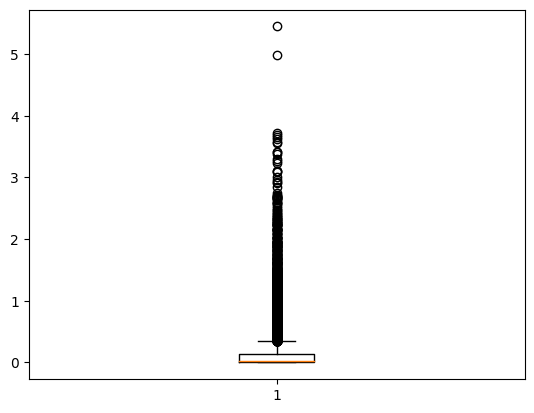

In [20]:
genesetScores = []
for node in kg.kg.nodes:
    nodeData = kg.get_node_data(node)
    if nodeData.get("type", None) == "gene":
        genesetScores.append(get_score(nodeData))
        
plt.boxplot(genesetScores)
plt.show()
plt.close()

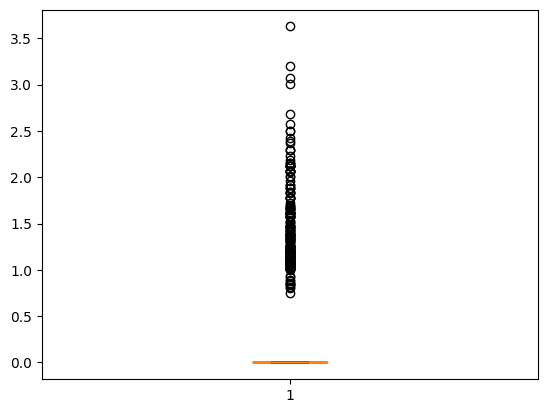

In [21]:
genesetScores = []
for node in kg.kg.nodes:
    nodeData = kg.get_node_data(node)
    if nodeData.get("type", None) == "geneset":
        genesetScores.append(get_score(nodeData))
        
plt.boxplot(genesetScores)
plt.show()
plt.close()

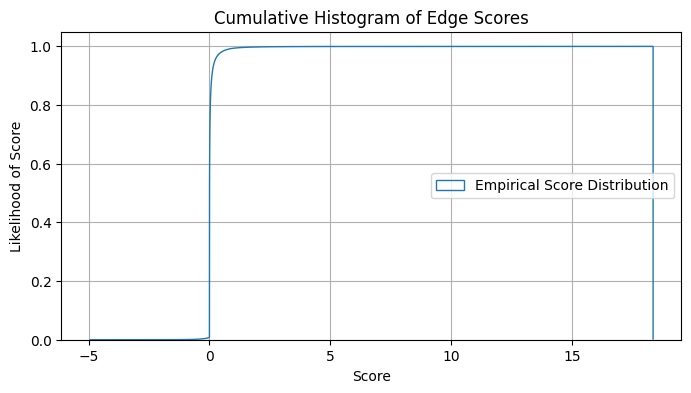

In [22]:
kg.plot_score_histogram(edge_types=[("gene", "gene")])

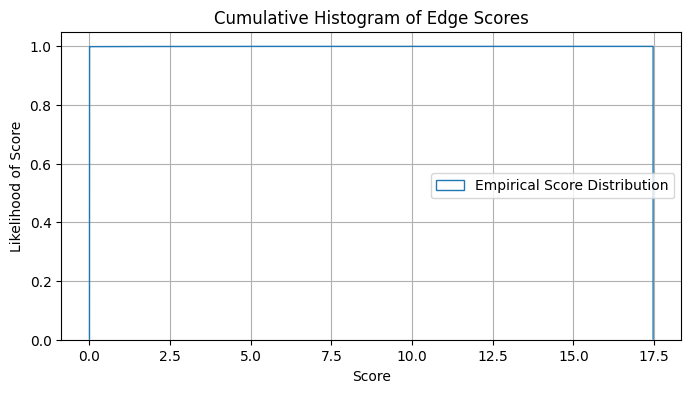

In [23]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")])

In [24]:
exprKGs = {}

for group in exprDFs:
    
    print(group)
    
    gKG = KGraph()
    
    gKG.load_kgraph("../data/initial_base_graph.out")

    gKG.add_gene_expression(exprDFs[group])

    mNS = MeanNetworkScorer()
    mNS.score(gKG)
        
    exprKGs[group] = gKG

Adipocyte
22891
Found Genes 15327


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Cardiomyocyte
28072
Found Genes 16697
Cycling cells
24070
Found Genes 15906
Endothelial
27840
Found Genes 16695
Fibroblast
28074
Found Genes 16742
Lymphoid
25525
Found Genes 16282
Mast
20817
Found Genes 14853
Myeloid
27246
Found Genes 16618
Neuronal
24790
Found Genes 15976
Pericyte
26333
Found Genes 16329
vSMCs
24144
Found Genes 15727


In [25]:
import pickle

with open("exprkgs.pickle", 'wb') as f:
    pickle.dump(exprKGs, f)

In [26]:
for edge in kg.get_node_edges("CCL2", in_types=["gene"], out_types=["gene"]):
    
    inExpr = kg.get_node_data(edge[0]).get("expression", {}).get("mean", 0)
    outExpr = kg.get_node_data(edge[1]).get("expression", {}).get("mean", 0)
    edgeType = kg.kg.edges[edge].get("type", "-")
    
    print(edge, edgeType, kg.kg.edges[edge]["score"])

('NFE2L2', 'CCL2') represses 0.41951645583441255
('CCL13', 'CCL2') interacts 2.813928229373769e-05
('JUN', 'CCL2') interacts 0.013438076371693454
('FOSL1', 'CCL2') activates 0.0005785075927194532
('LIF', 'CCL2') interacts 0.00012735818074583632
('TNF', 'CCL2') interacts 1.700198920569425e-05
('TNFSF11', 'CCL2') activates 9.677589249760668e-06
('CSF2', 'CCL2') interacts 0.0
('CSF1', 'CCL2') interacts 0.0010823871260703226
('JAK2', 'CCL2') activates 0.02545820238419906
('OLR1', 'CCL2') activates 4.670583917795123e-05
('FOS', 'CCL2') interacts 0.006141870824852591
('HMOX1', 'CCL2') represses -0.03035098396655416
('CDK9', 'CCL2') activates 0.002584812054108121
('IL18', 'CCL2') interacts 0.0018557726910590848
('IL32', 'CCL2') activates 0.0009116643689669329
('ESR2', 'CCL2') represses 0.2042281240984477
('OSM', 'CCL2') activates 1.9698065359313038e-05
('IL6', 'CCL2') interacts 0.0001198742857430992
('SAA1', 'CCL2') activates 6.392819618803187e-05
('FPR1', 'CCL2') activates 0.0002613918347348

In [27]:
for edge in kg.get_node_edges("CCL2"):

    edgeType = kg.kg.edges[edge].get("type", "-")
    
    print(edge, kg.kg.edges[edge])
    print(edge, edgeType, kg.kg.edges[edge]["score"])

('NFE2L2', 'CCL2') {'type': 'represses', 'source': 'omnipath', 'omnipath_evidences': ['NRF2ome:16246346'], 'omnipath_type': 'post_translational', 'score': 0.41951645583441255}
('NFE2L2', 'CCL2') represses 0.41951645583441255
('CCL13', 'CCL2') {'type': 'interacts', 'source': 'STRING', 'omnipath_evidences': ['InnateDB:16803905'], 'omnipath_type': 'post_translational', 'string_scores': {'fusion': 0, 'coexpression': 138, 'experiments': 237, 'database': 0, 'textmining': 830, 'score': 0.83}, 'score': 2.813928229373769e-05}
('CCL13', 'CCL2') interacts 2.813928229373769e-05
('JUN', 'CCL2') {'type': 'interacts', 'source': 'STRING', 'omnipath_evidences': ['nan'], 'omnipath_type': 'transcriptional', 'string_scores': {'fusion': 0, 'coexpression': 0, 'experiments': 0, 'database': 900, 'textmining': 681, 'score': 0.9}, 'score': 0.013438076371693454}
('JUN', 'CCL2') interacts 0.013438076371693454
('FOSL1', 'CCL2') {'type': 'activates', 'source': 'omnipath', 'omnipath_evidences': ['nan'], 'omnipath_ty

In [28]:
kg.kg.nodes["GO:0007568"]

{'id': 'GO:0007568',
 'name': 'aging',
 'type': 'geneset',
 'ns': 'biological_process',
 'score': 0,
 'source': 'GeneOntology'}

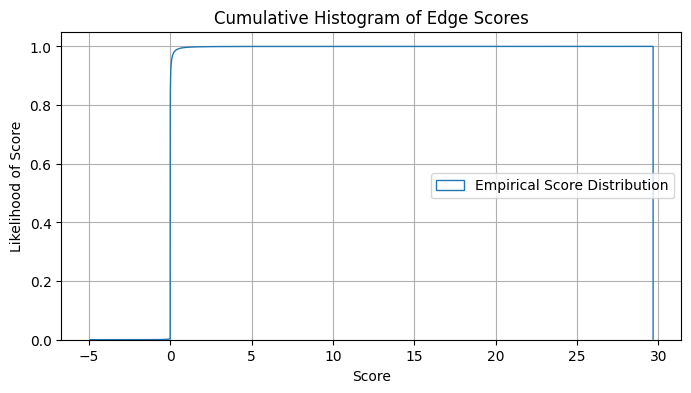

In [29]:
kg.plot_score_histogram()

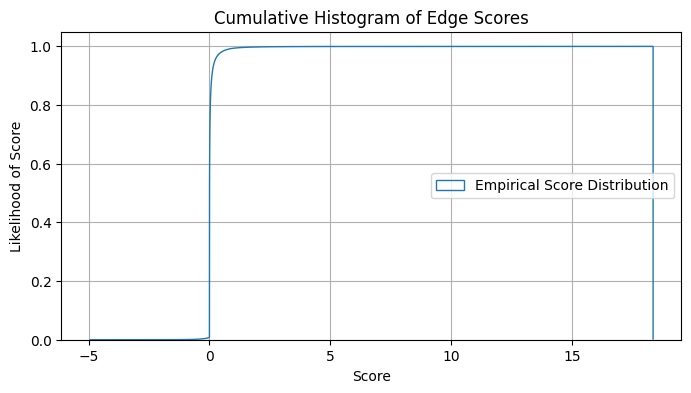

In [30]:
kg.plot_score_histogram(edge_types=[("gene", "gene")])

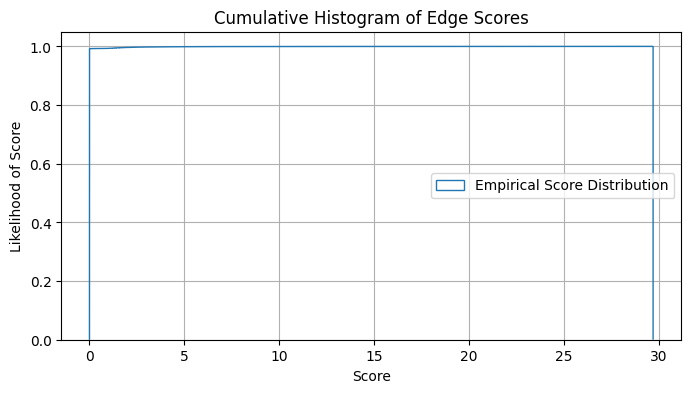

In [31]:
kg.plot_score_histogram(edge_types=[("gene", "disease")])

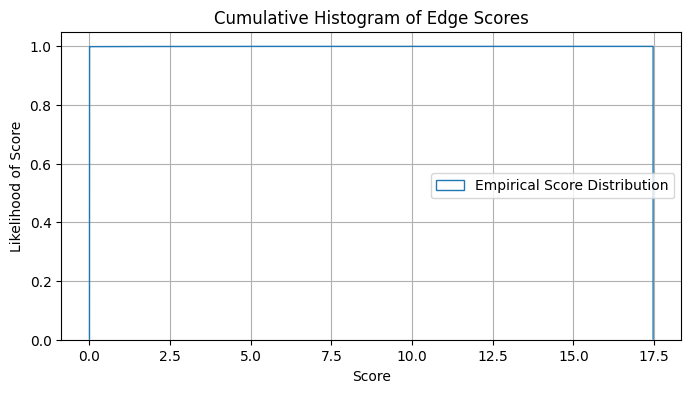

In [32]:
kg.plot_score_histogram(edge_types=[("gene", "geneset")])

['gene -> geneset', 'gene -> gene', 'gene -> disease', 'geneset -> geneset', 'drug -> disease', 'drug -> gene', 'drug -> geneset']
             class  value
0  gene -> geneset    0.0
1  gene -> geneset    0.0
2  gene -> geneset    0.0
3  gene -> geneset    0.0
4  gene -> geneset    0.0


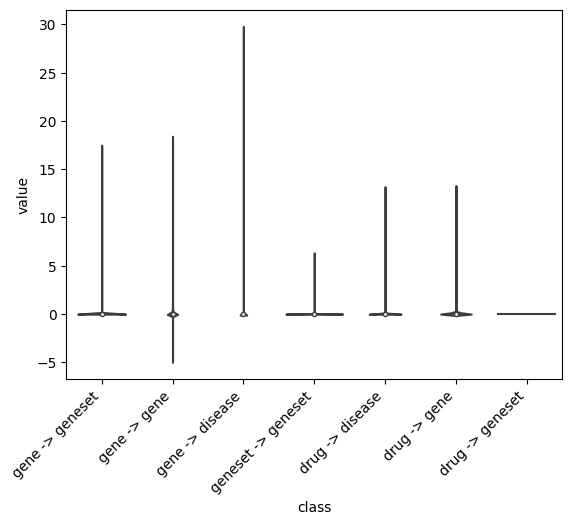

In [33]:
kg.plot_score_violin(per_edge_type=True)

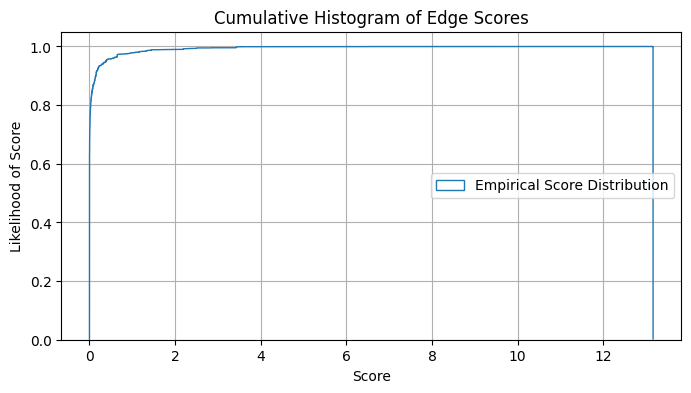

In [34]:
kg.plot_score_histogram(edge_types=[("drug", "gene")])

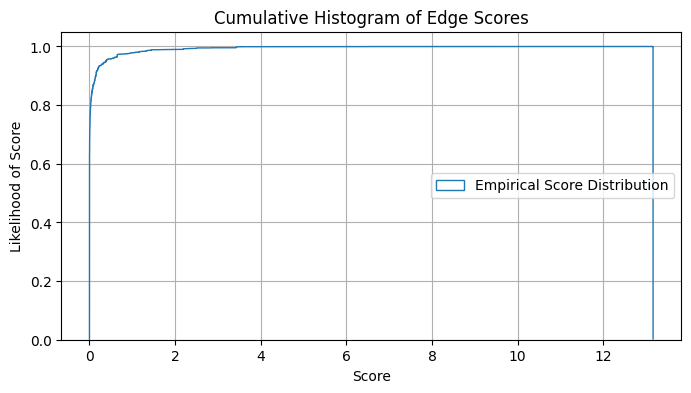

In [35]:
exprKGs["Cardiomyocyte"].plot_score_histogram(edge_types=[("drug", "gene")])

In [2]:
exprKGs = pickle.load(open("exprkgs.pickle", "rb"))

In [3]:
kg=exprKGs["Cardiomyocyte"]

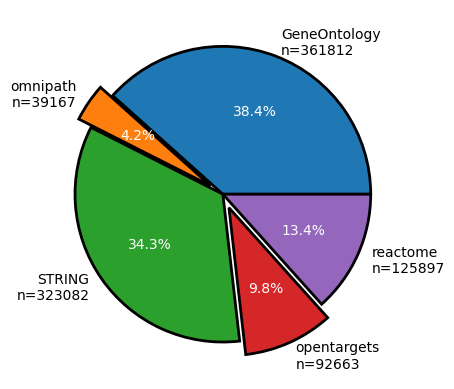

In [4]:
kg.plot_edge_sources()

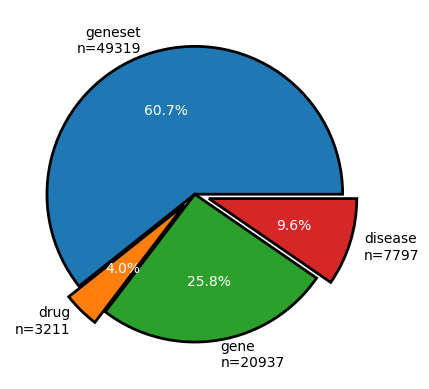

In [4]:
kg.plot_node_types()

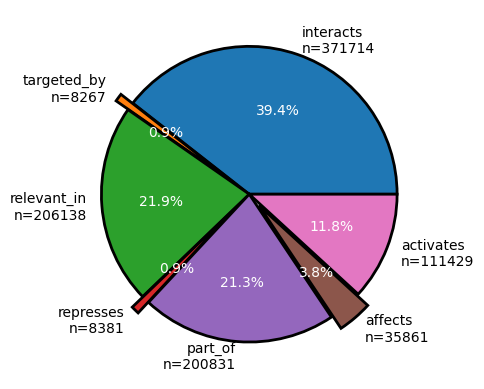

In [5]:
kg.plot_edge_types()

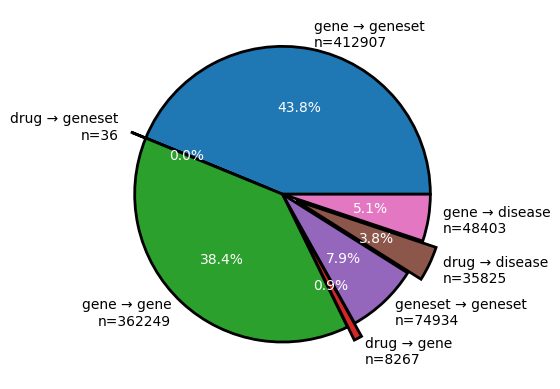

In [6]:
kg.plot_edge_between_types()

In [7]:
kg.random_state=42

In [8]:
comms = kg.get_communities(minEdgeScore = 1.0, resolution=4)

DiGraph with 1536 nodes and 3114 edges


In [9]:
dmi = DifferentialModuleIdentifier()
sigcomm = dmi.identify_differential_communities(comms, "Cardiomyocyte", exprKGs, verbose=False, min_enriched=0.9, minLogFC=-1)   

In [10]:
sigcomm

['Module_1',
 'Module_7',
 'Module_8',
 'Module_11',
 'Module_12',
 'Module_17',
 'Module_21',
 'Module_22',
 'Module_23',
 'Module_28',
 'Module_29',
 'Module_34',
 'Module_101',
 'Module_35',
 'Module_39',
 'Module_52',
 'Module_42',
 'Module_50',
 'Module_62',
 'Module_63',
 'Module_69',
 'Module_70',
 'Module_64',
 'Module_74',
 'Module_100']

Module_21
171


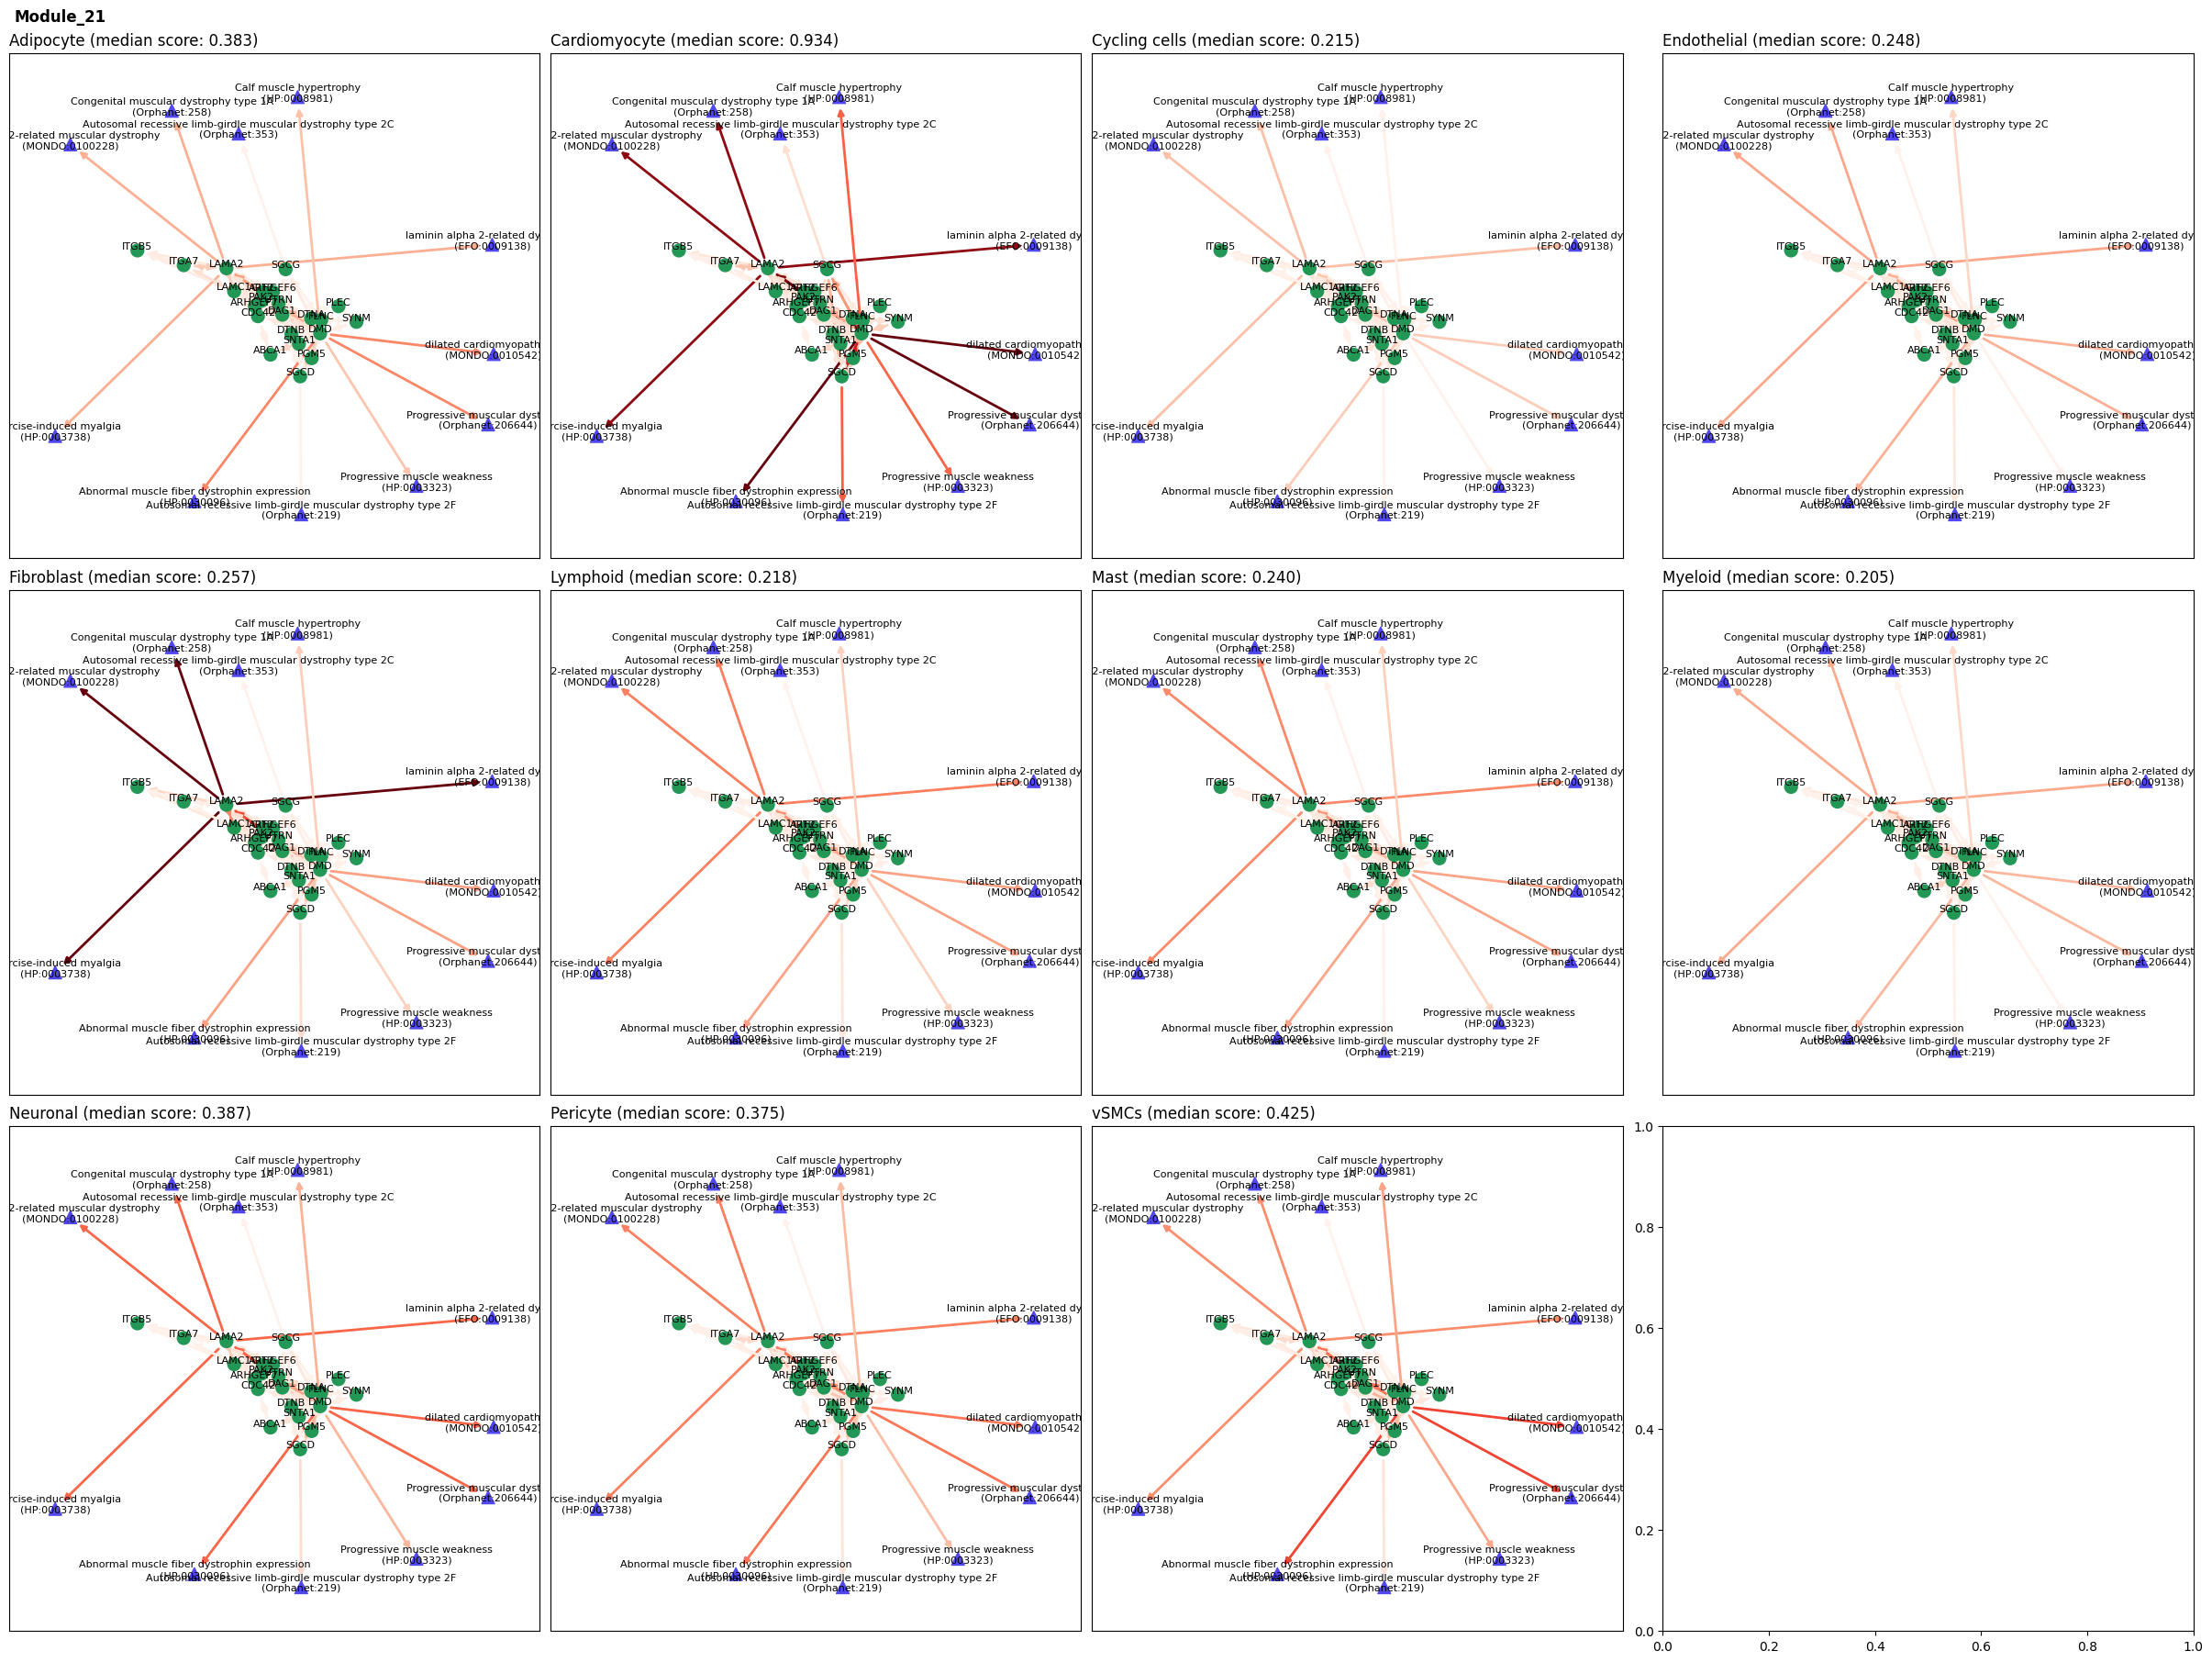

Module_22
113


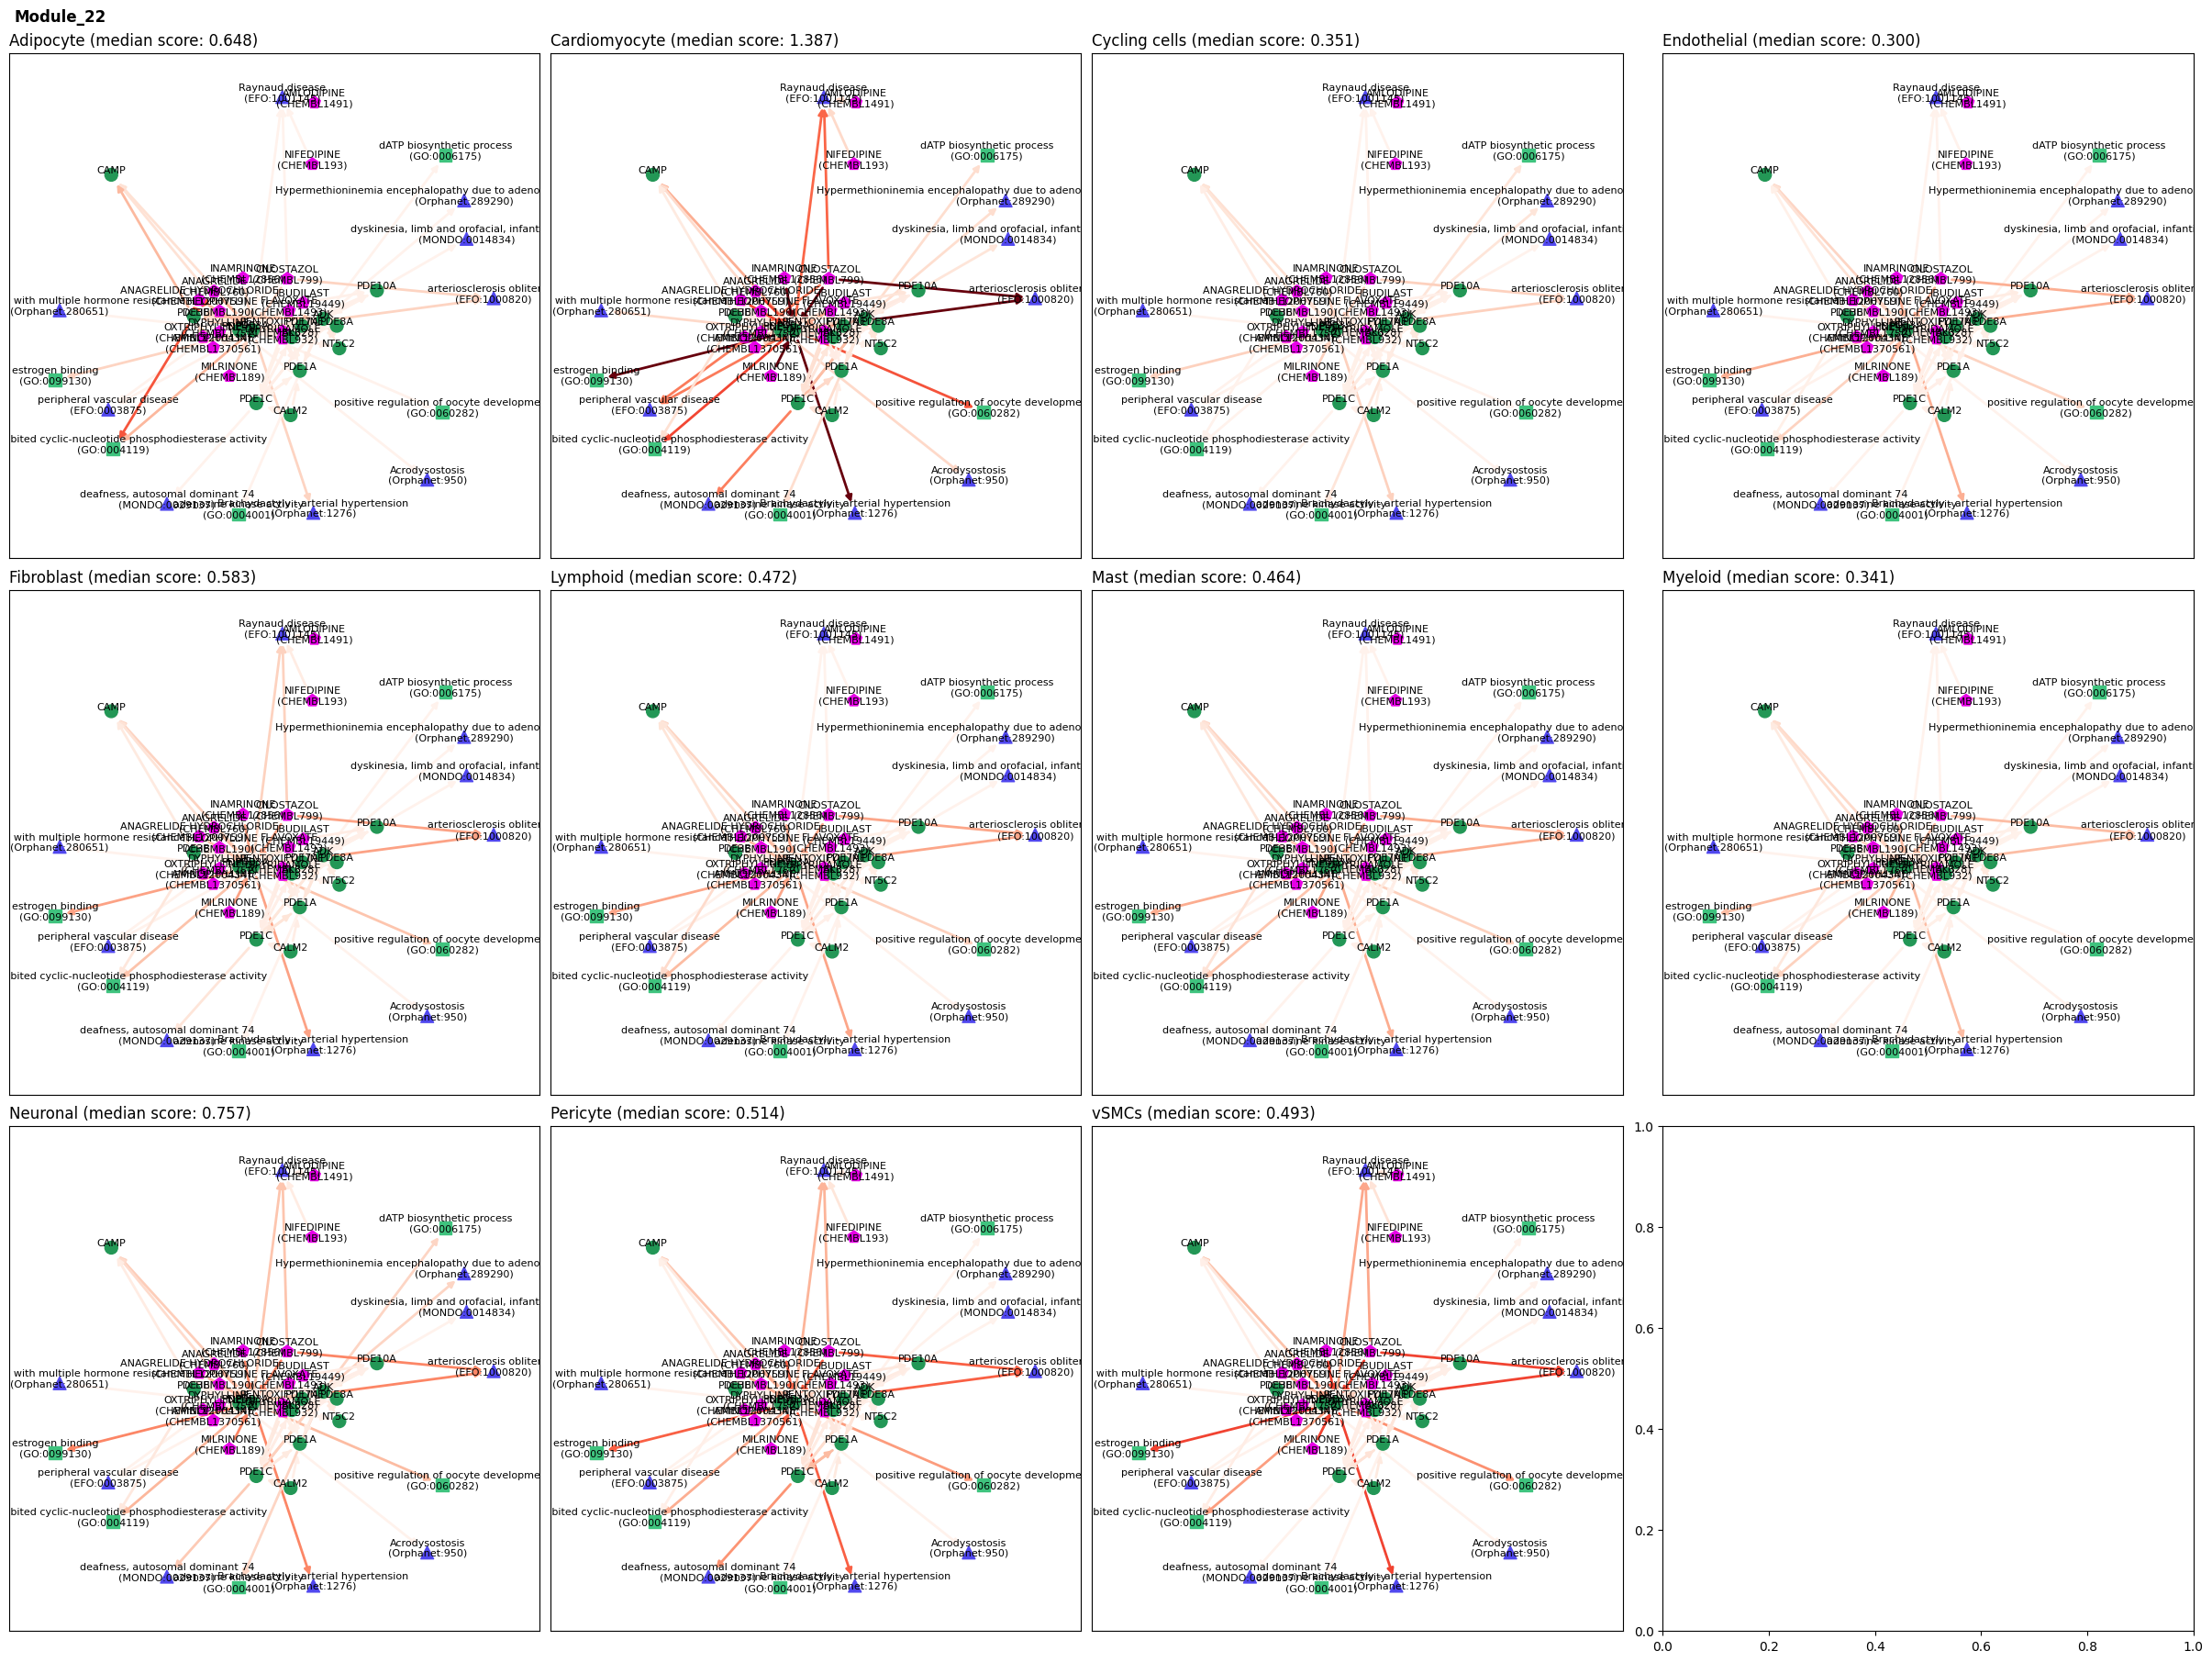

Module_23
57


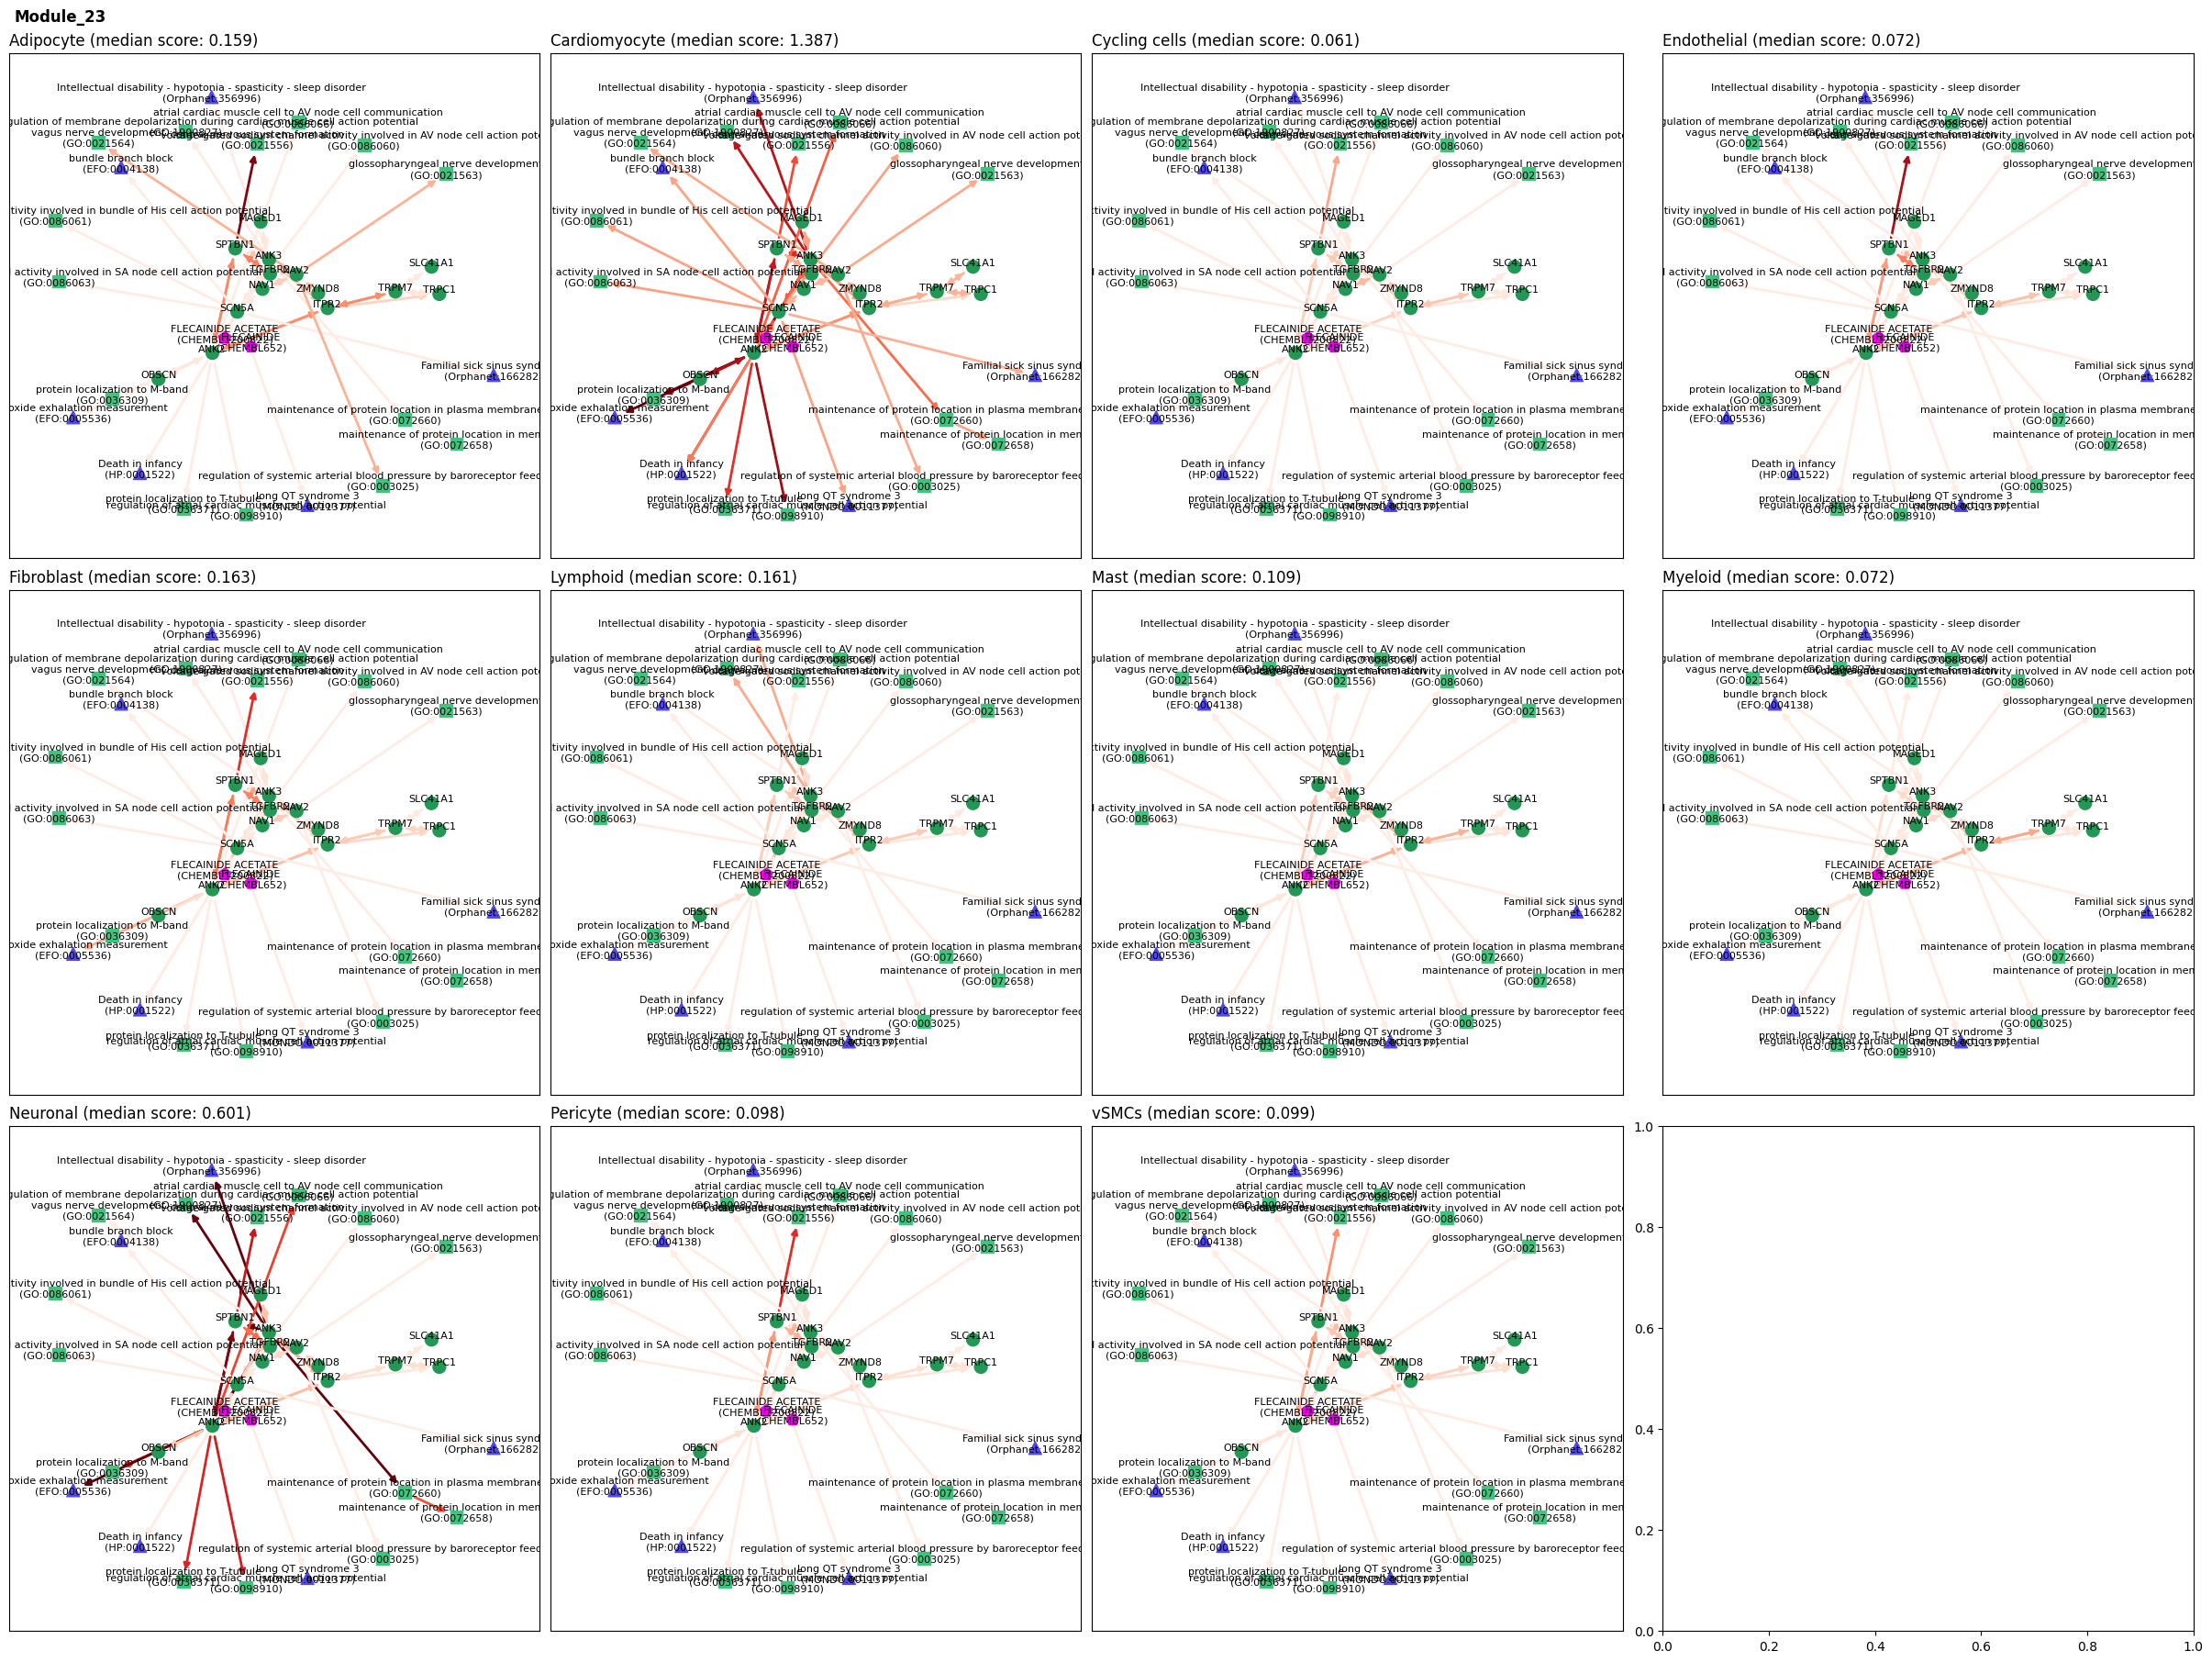

Module_29
186


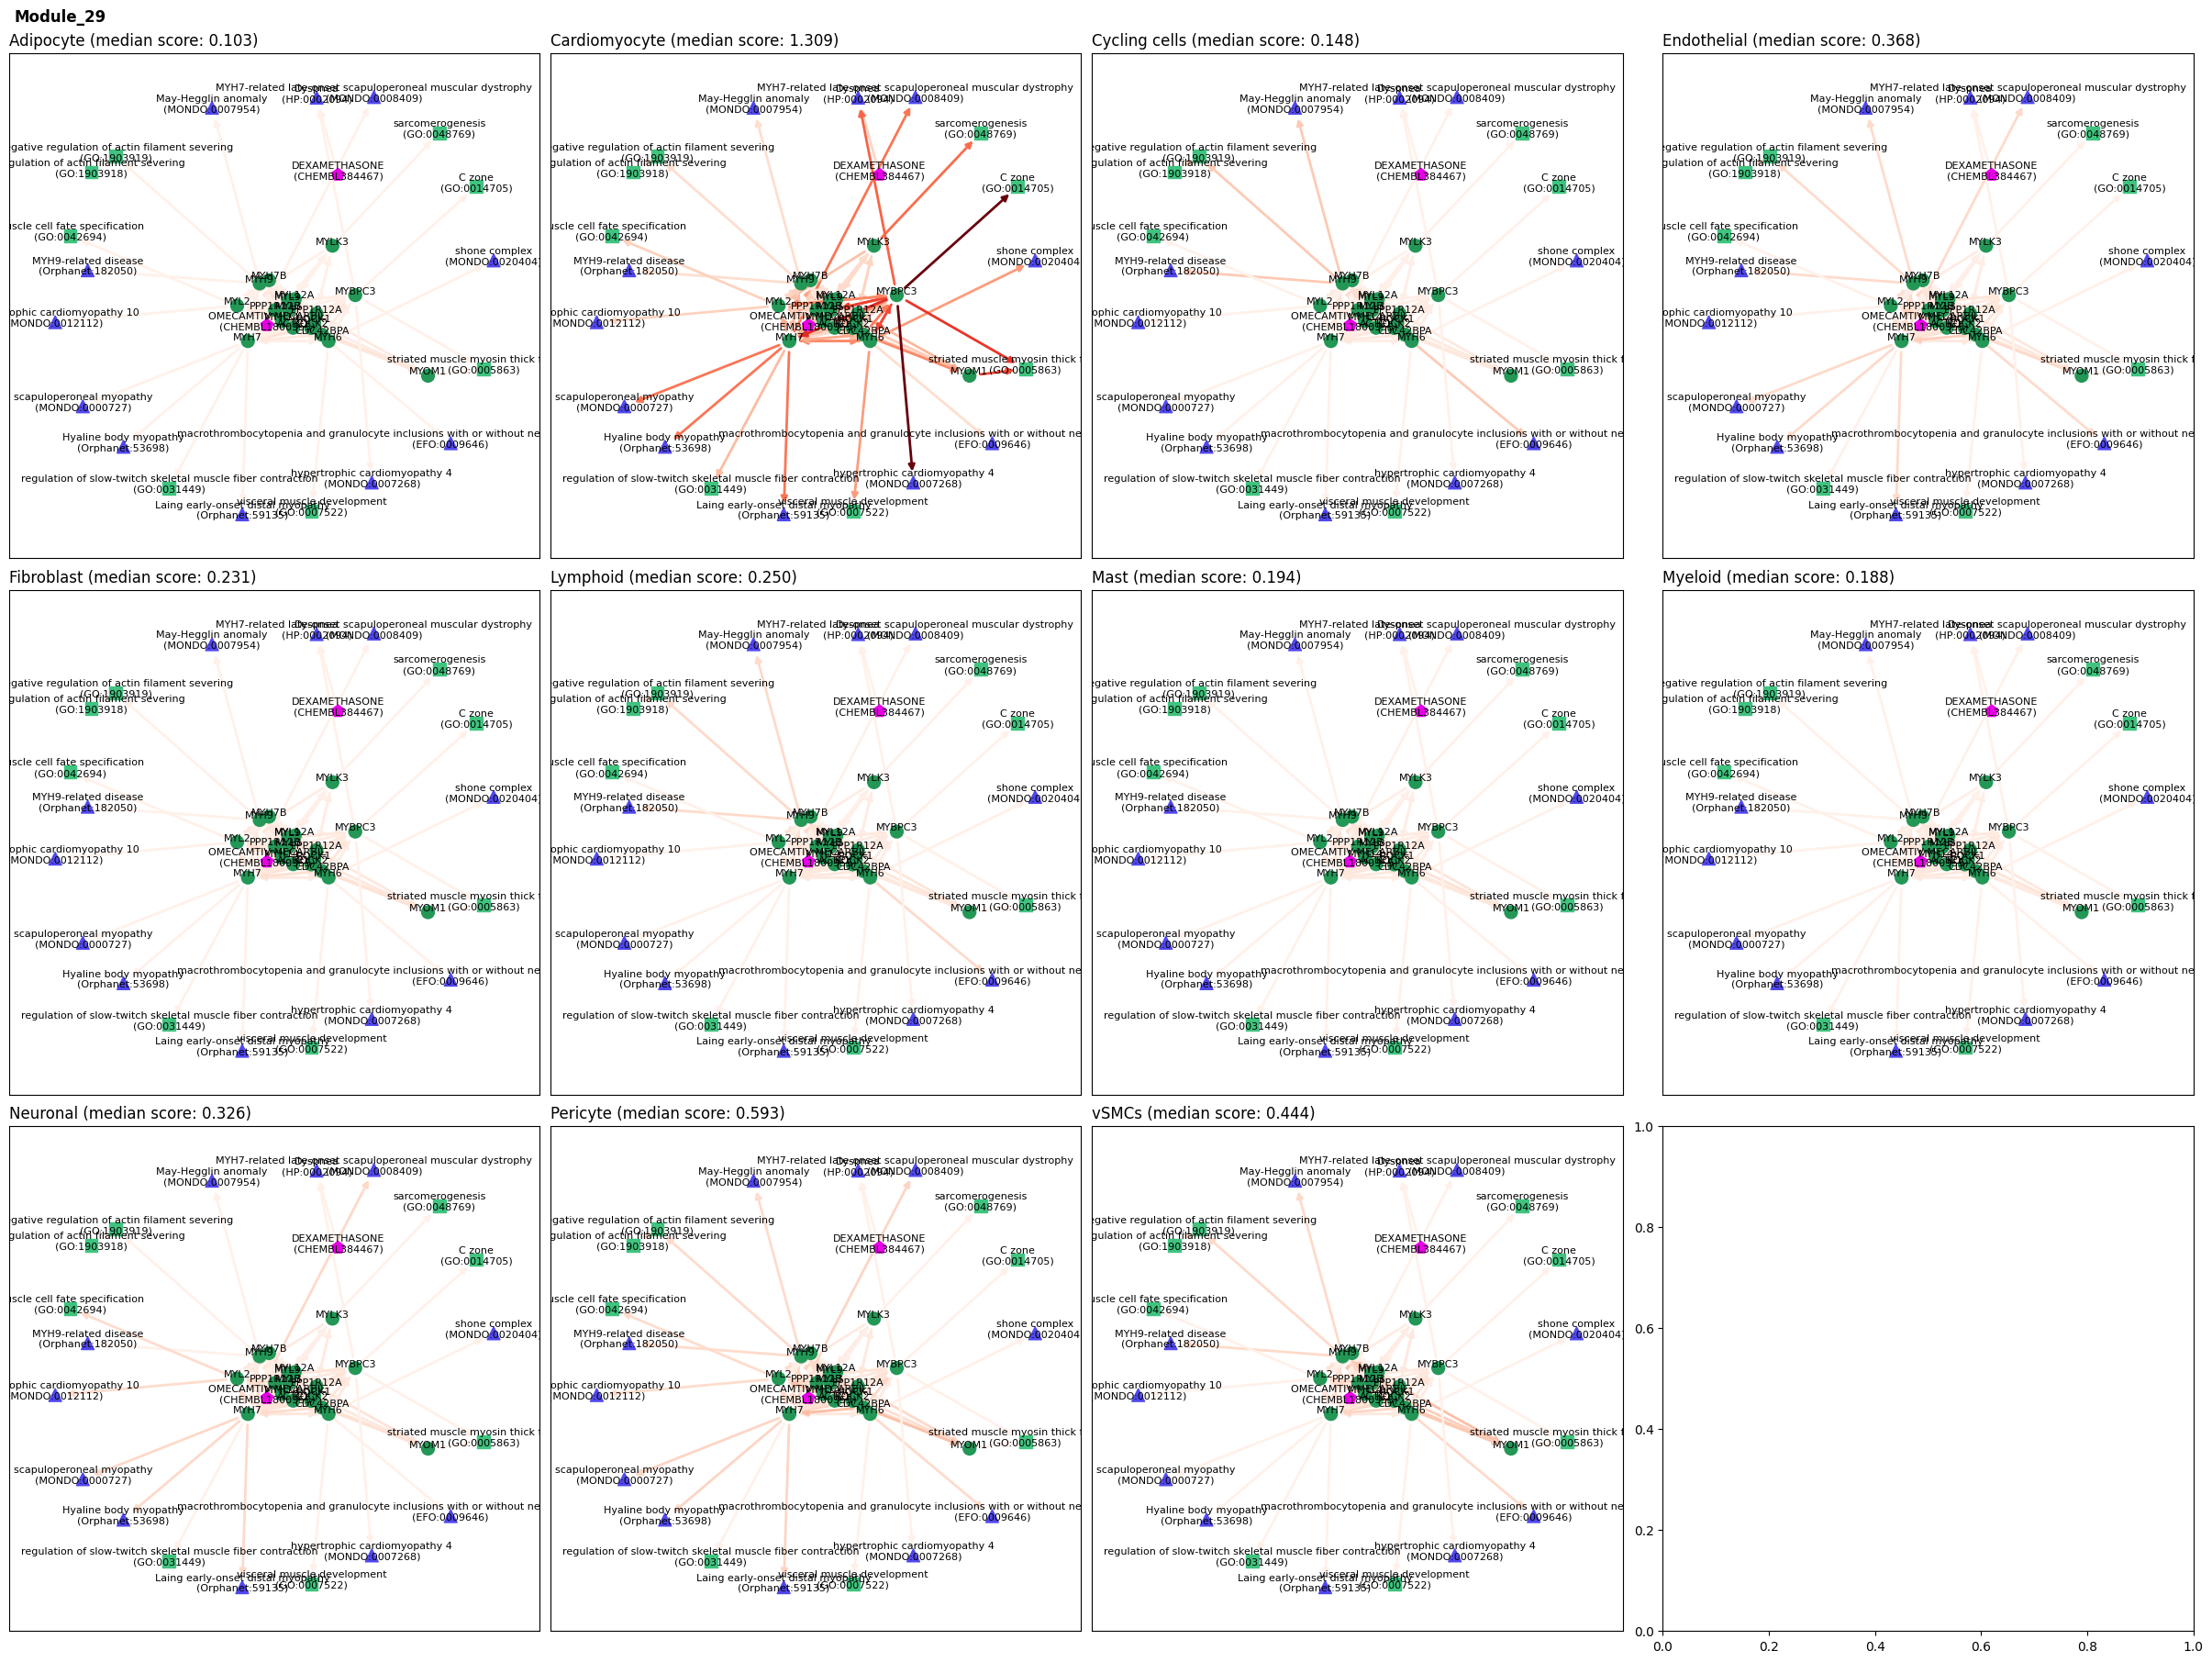

Module_34
62


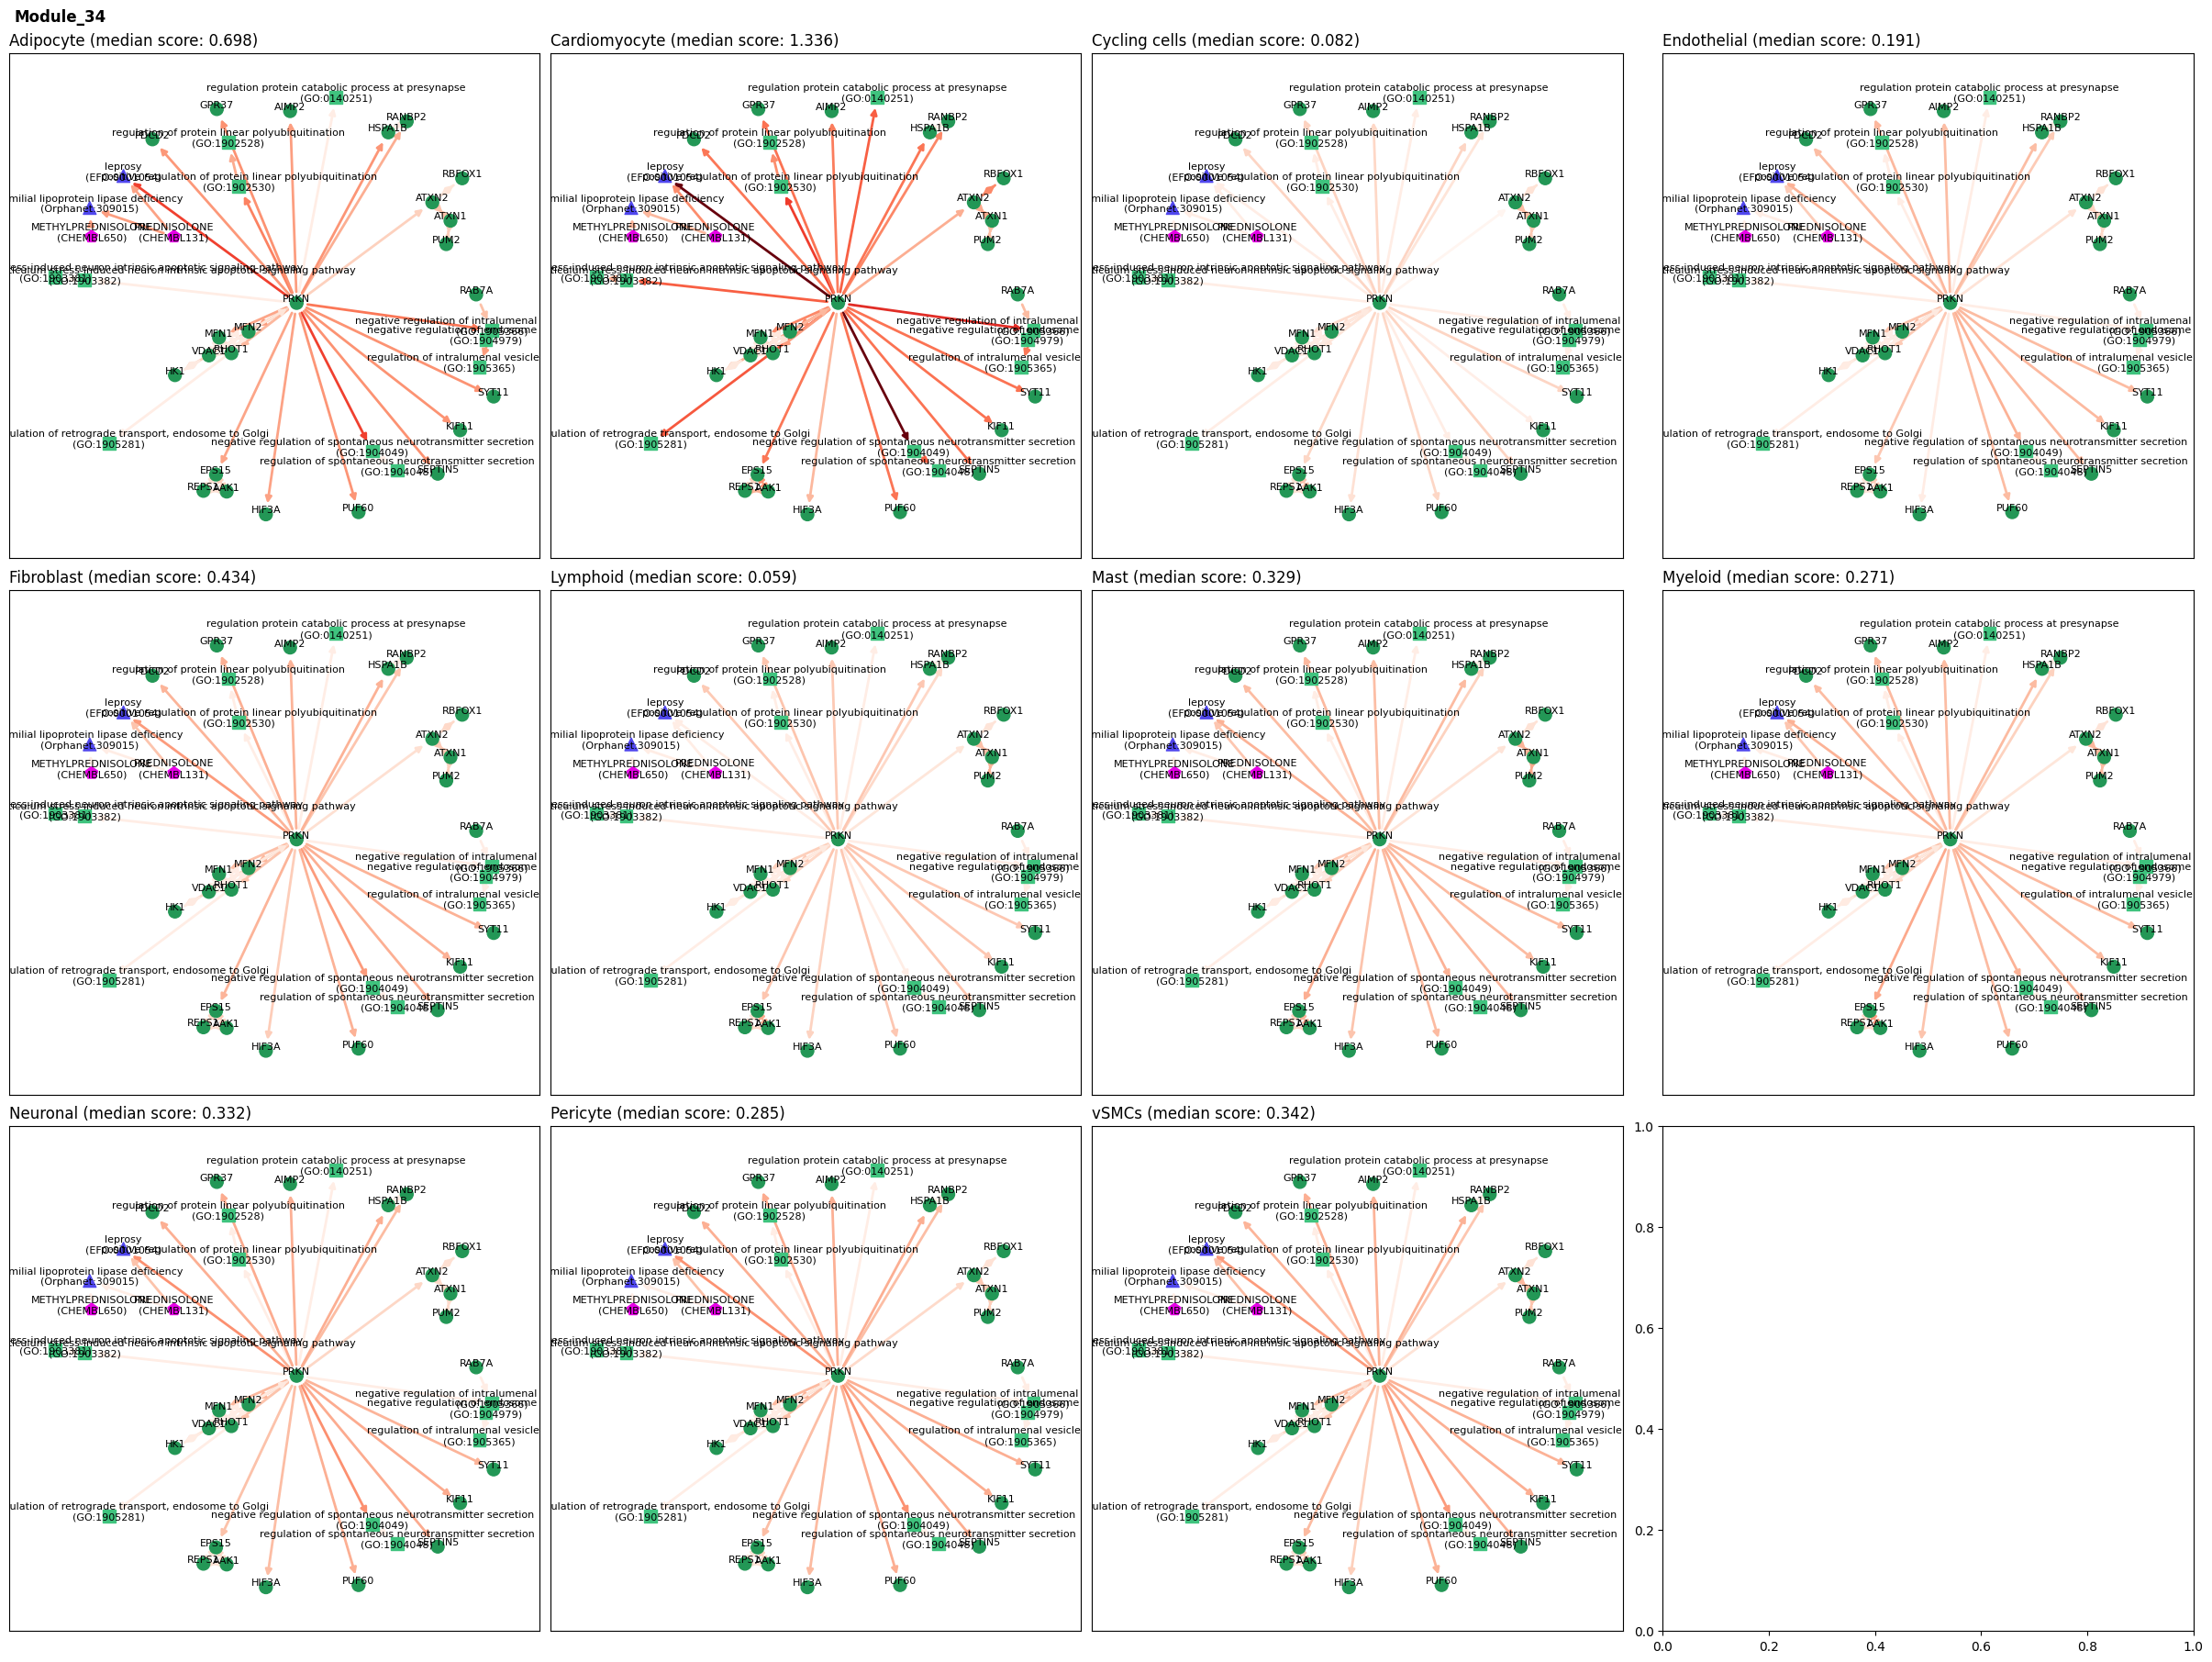

Module_42
74


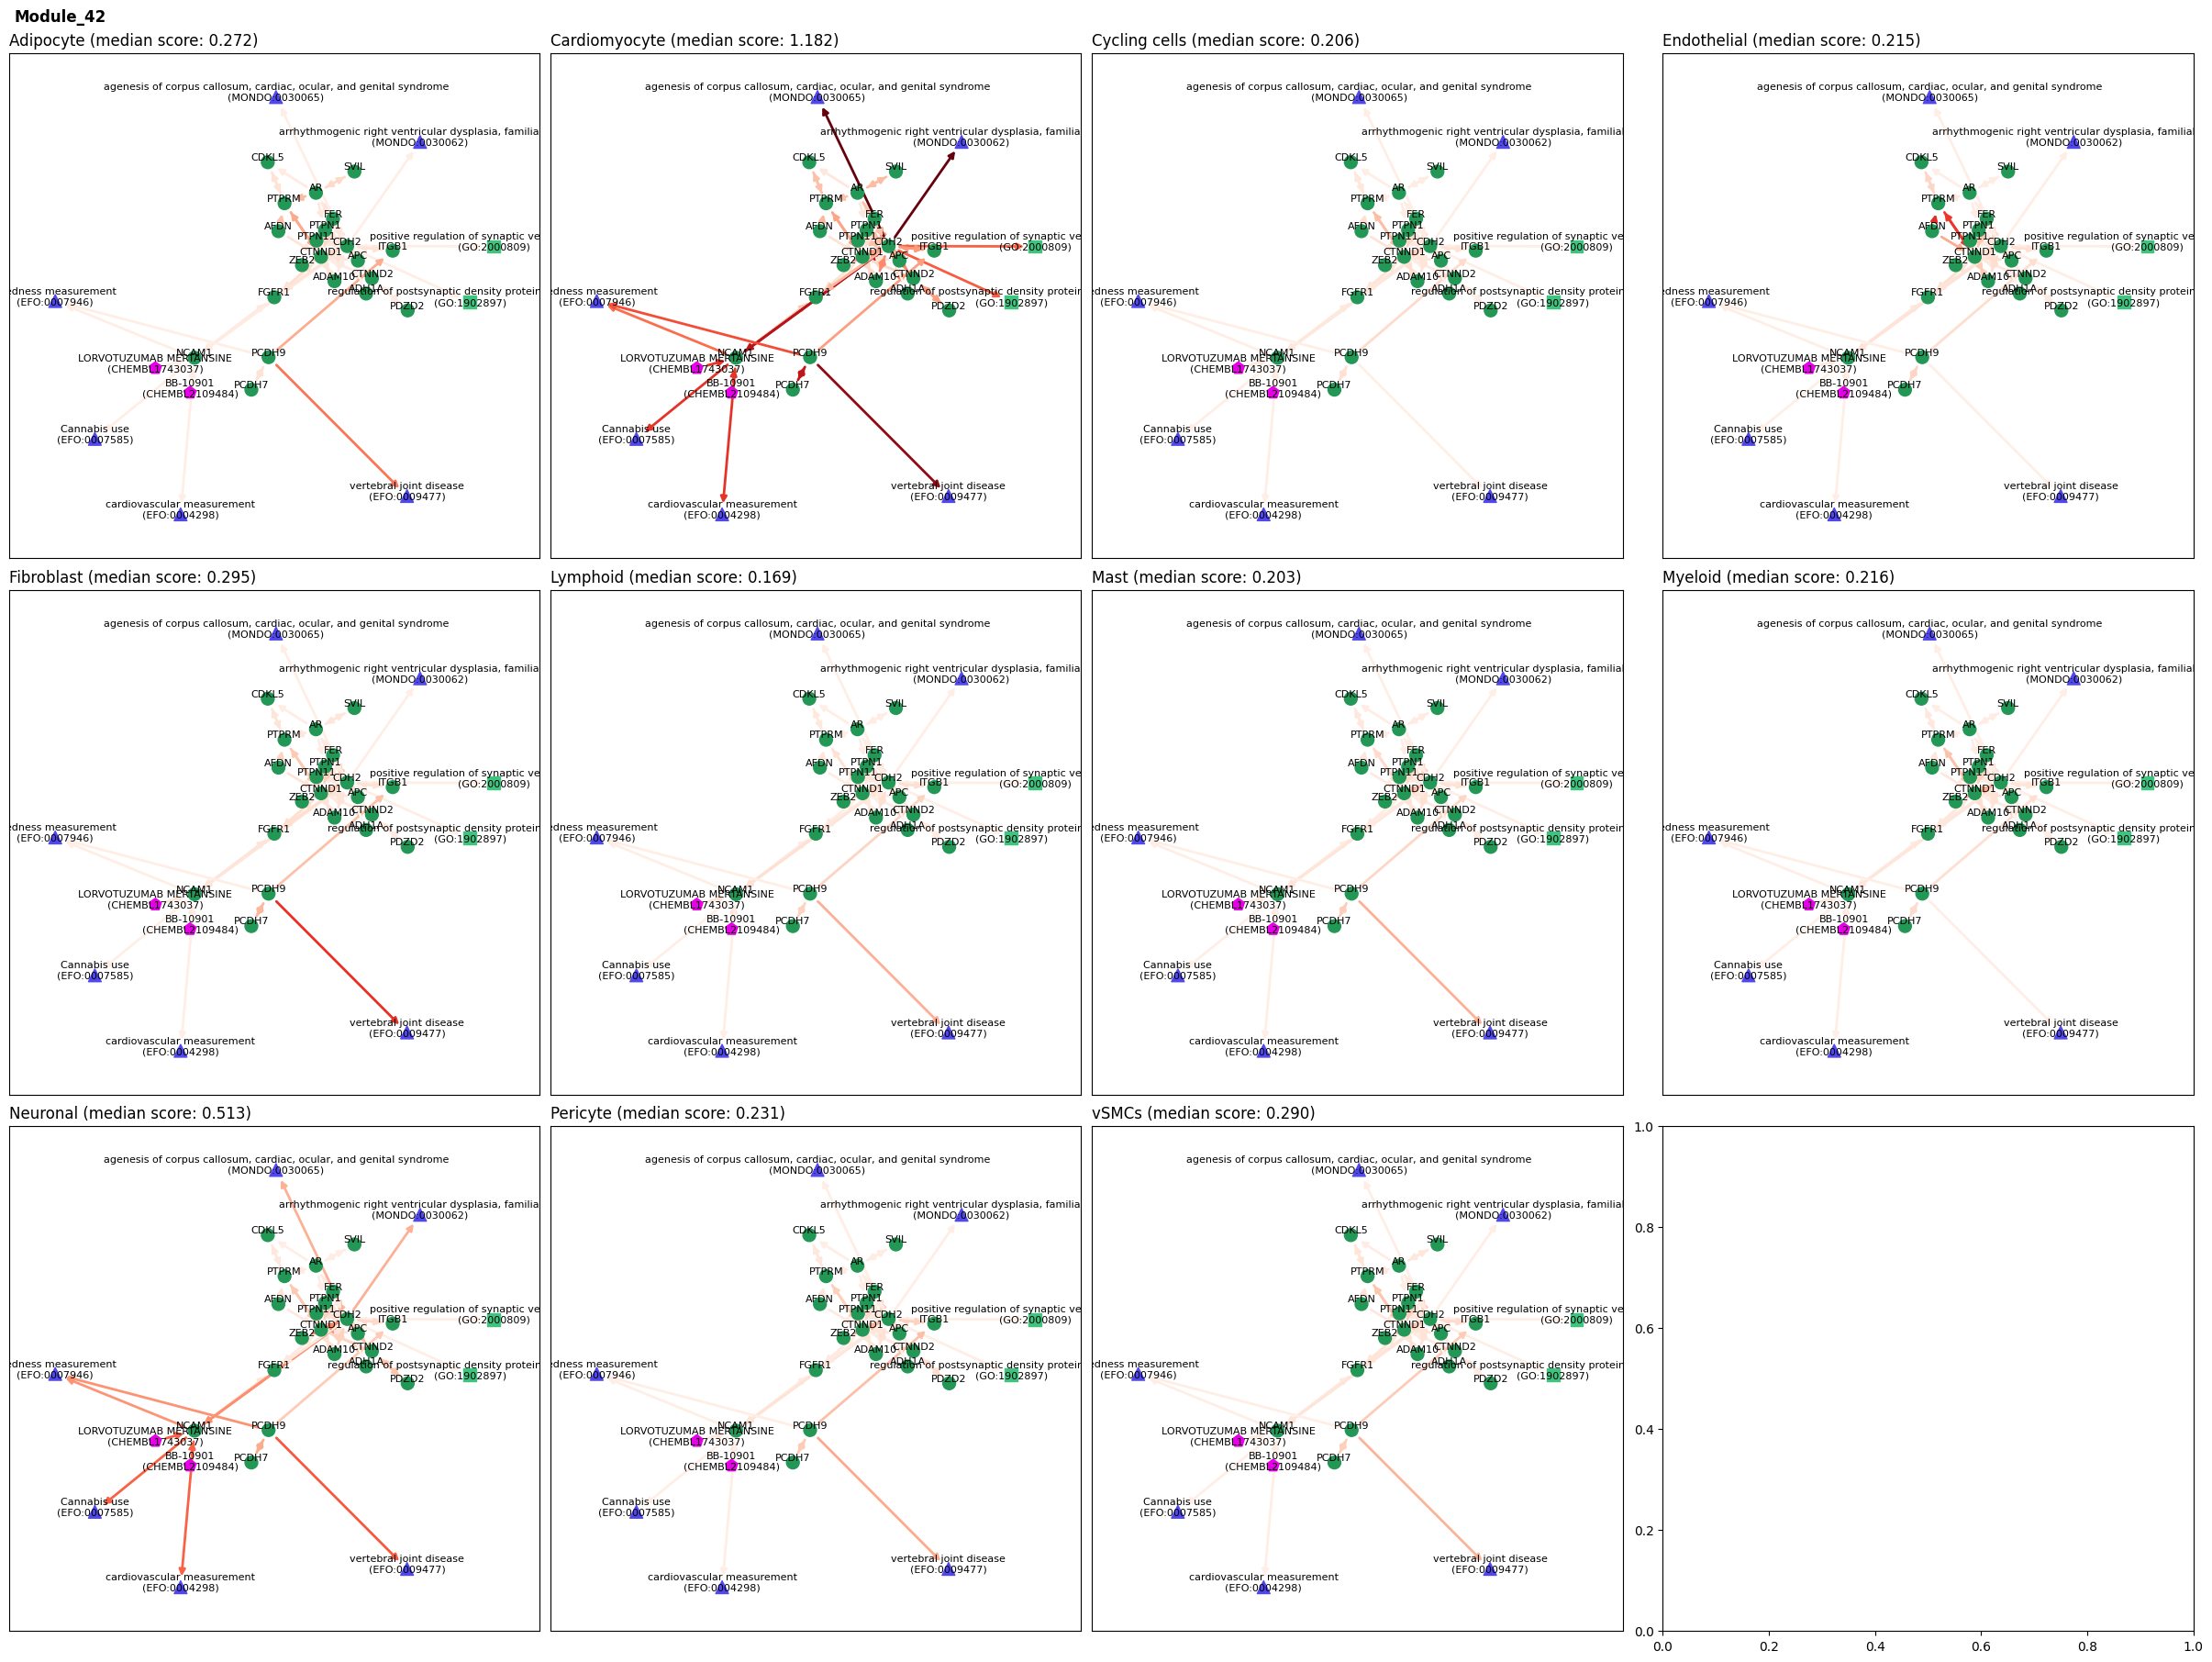

Module_50
166


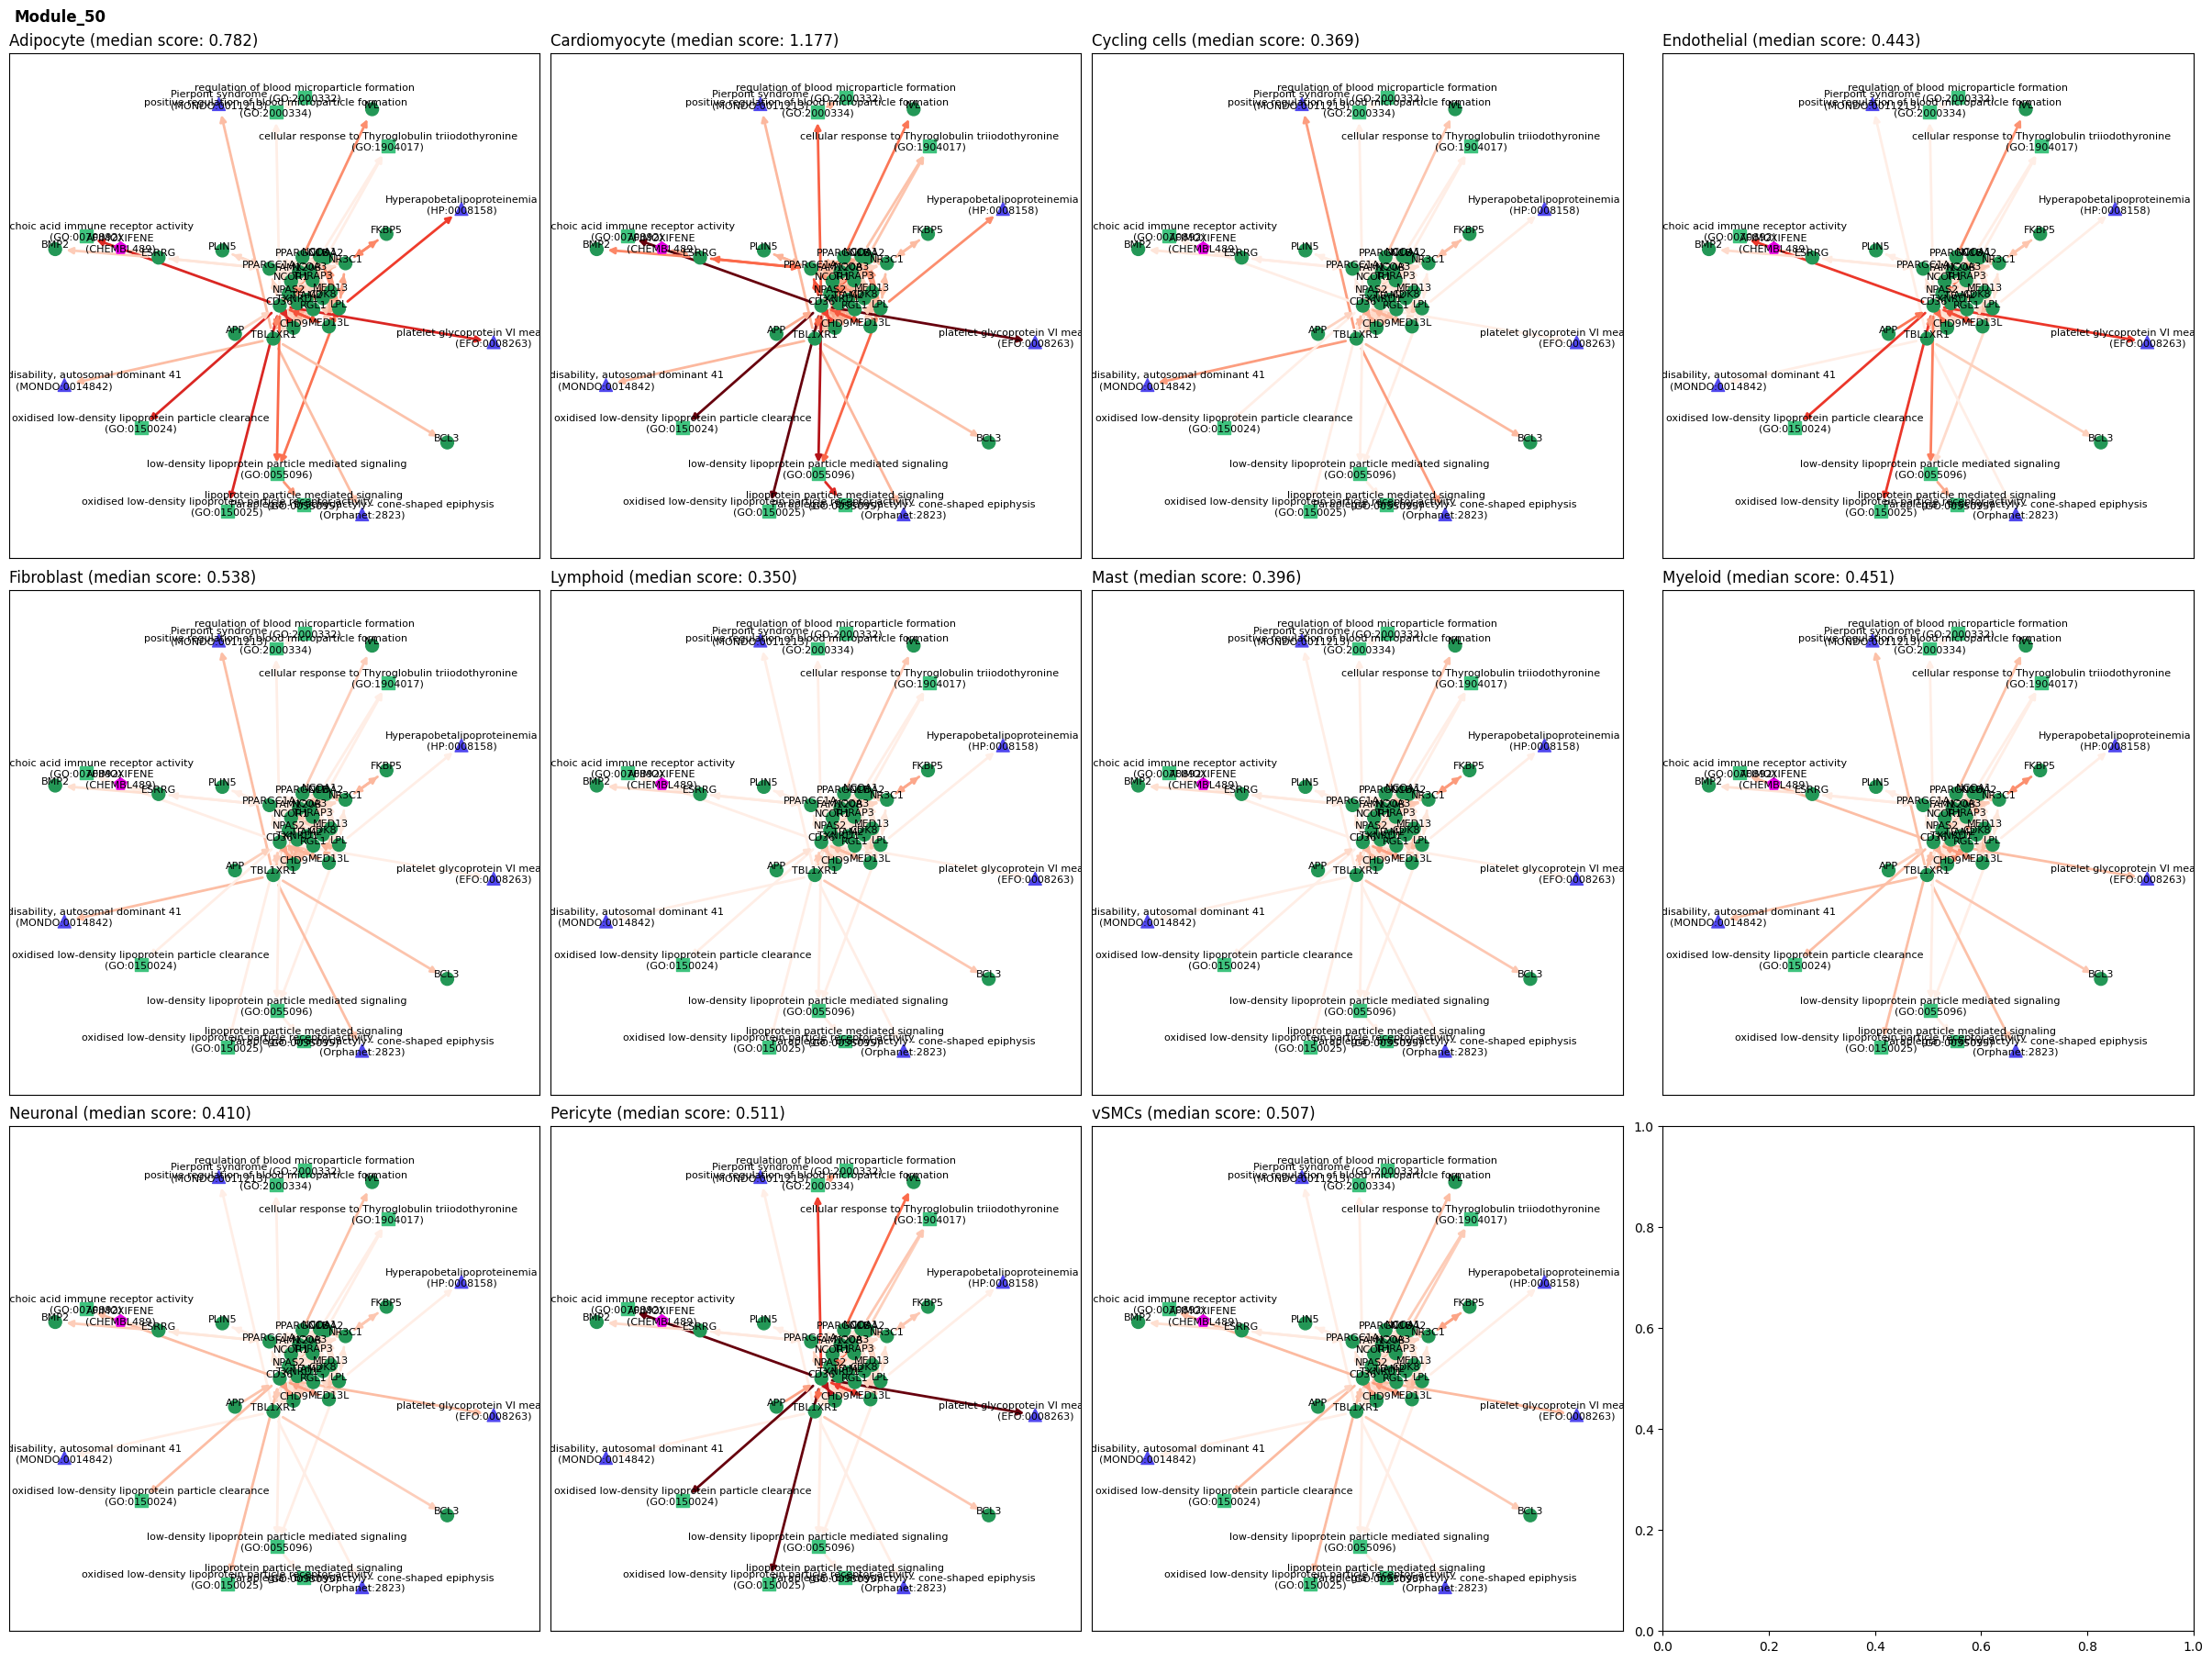

In [11]:
matplotlib.rcParams['figure.figsize'] = [6, 6]


for comm in sigcomm:
    
    if 30 < len(comms[comm]) < 100:
        
        print(comm)
        dmi.plot_communities(exprKGs, [comms[comm]], "Cardiomyocyte", main_net=[comms[comm]], font_size=6, titles=[comm], num_columns=4, outfile="../basic_graph_modules/{}".format(comm))